# The Dataset

## Description

This dataset provides a comprehensive collection of NBA player statistics, including standard metrics like Assists Per Game and advanced statistics such as Player Efficiency Rating (PER) and Value Over Replacement Player (VORP). The dataset aims to predict the NBA Most Valuable Player (MVP) through a Machine Learning Model, with data sourced from the reputable https://www.basketball-reference.com via web scraping.

The dataset is complete with standard and advanced statistics, ensuring a thorough analysis of player performance. The project, available in the Code section, details the machine learning model for predicting the NBA MVP.

Feedback is encouraged for potential additions to enhance the dataset. For a deeper understanding of statistical calculations, a glossary is provided at https://www.basketball-reference.com/about/glossary.html. This concise resource explains the methodologies behind various metrics, supporting a more informed interpretation of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

NBAMVP_df = pd.read_csv("Data/NBA_Dataset.csv")
NBAMVP_df.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


# Cleaning the dataset

The challenge in predicting the NBA MVP lies in the inherent imbalance of classes, as the prestigious award is granted to only one player per season, making traditional classification models less effective in capturing the nuanced and competitive nature of the MVP selection process.

To try to tackle that issue, we are aiming at predicting NBA Votes since more players get votes each year. But still, the classes are very unbalanced.

In [13]:
def determine_mvp_status(group):
    max_votes_index = group['award_share'].idxmax()
    group['MVP'] = 'Not MVP'
    group.loc[max_votes_index, 'MVP'] = 'MVP'
    return group

# Apply the function to each group (season)
NBAMVP_df_for_plot = NBAMVP_df.groupby('season').apply(determine_mvp_status)
NBAMVP_df_for_plot['mvp_votes_category'] = NBAMVP_df_for_plot['award_share'].apply(lambda x: 'With MVP Votes' if x > 0 else 'Without MVP Votes')
NBAMVP_df_for_plot.head()

season               player pos  age team_id   g  gs  mp_per_g  \
season                                                                     
1982   0    1982  Kareem Abdul-Jabbar   C   34     LAL  76  76      35.2   
       1    1982          Alvan Adams   C   27     PHO  79  75      30.3   
       2    1982         Mark Aguirre  SF   22     DAL  51  20      28.8   
       3    1982          Danny Ainge  SG   22     BOS  53   1      10.6   
       4    1982       Tiny Archibald  PG   33     BOS  68  51      31.9   

          fg_per_g  fga_per_g  ...  obpm  dbpm  bpm  vorp  award_share   mov  \
season                         ...                                             
1982   0       9.9       17.1  ...   3.8   1.2  5.0   4.7        0.045  4.87   
       1       6.4       13.0  ...   1.4   2.2  3.6   3.4        0.000  3.45   
       2       7.5       16.1  ...   2.3  -1.6  0.7   1.0        0.000 -4.43   
       3       1.5        4.2  ...  -3.7   1.0 -2.7  -0.1        0.000  6.38   
       4       4.5        9.6  ...   1.4  -1.3  0.1   1.1        0.000  6.38   

          mov_adj  win_loss_pct      MVP  mvp_votes_category  
season                                                        
1982   0     4.37         0.695  Not MVP      With MVP Votes  
       1     3.05         0.561  Not MVP   Without MVP Votes  
       2    -4.48         0.341  Not MVP   Without MVP Votes  
       3     6.35         0.768  Not MVP   Without MVP Votes  
       4     6.35         0.768  Not MVP   Without MVP Votes  

[5 rows x 57 columns]

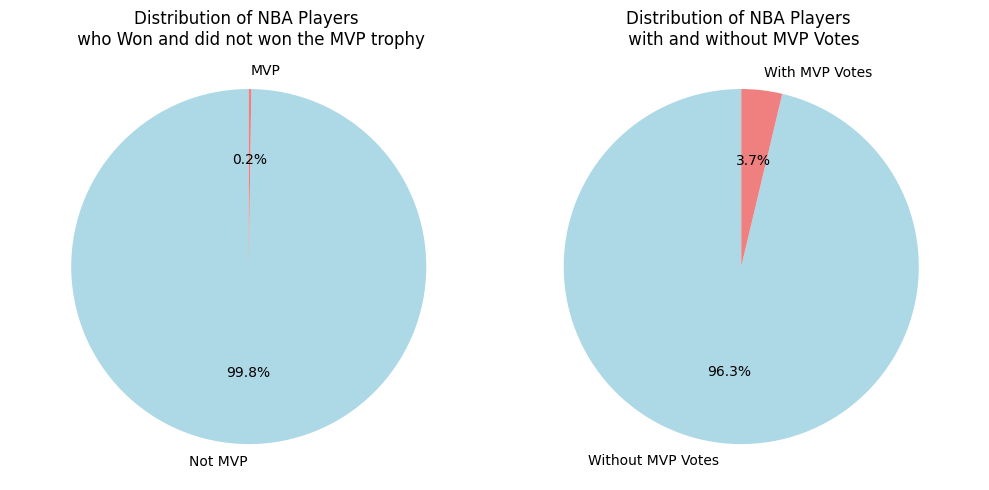

In [14]:
mvp_counts = NBAMVP_df_for_plot['MVP'].value_counts()
mvp_votes_counts = NBAMVP_df_for_plot['mvp_votes_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts, labels=mvp_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n who Won and did not won the MVP trophy')


axs[1].pie(mvp_votes_counts, labels=mvp_votes_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes')

plt.tight_layout()

To address the issue of class imbalance in predicting the NBA MVP, we will employ undersampling techniques focused on key attributes that contribute to MVP candidacy or garner votes. By identifying and establishing cutoffs for these significant variables, we aim to create a more balanced and informative dataset, ensuring a more accurate representation of eligible players in the prediction model.

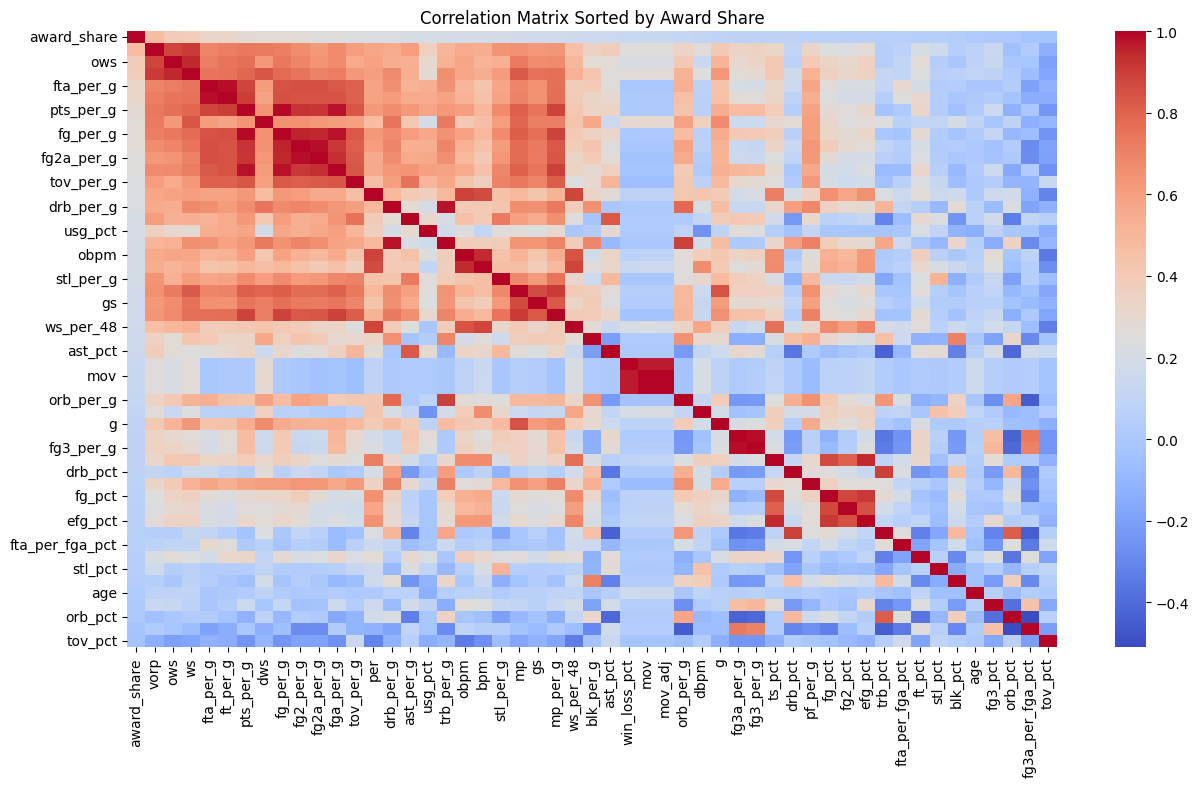

In [15]:
# Calculate the correlation matrix
correlation_matrix = NBAMVP_df.drop(['season','player','team_id','pos'], axis=1).corr()

# Sort the correlation matrix by the 'award_share' column
sorted_correlation = correlation_matrix['award_share'].sort_values(ascending=False)

# Use seaborn to plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(NBAMVP_df[sorted_correlation.index].corr(), cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Matrix Sorted by Award Share')
plt.show()

Let's look at some of those highly correlated columns to see if we can find a cutoffs and by doing also, eliminates players that did get votes but not clearly desevres them.

## VORP (Value over Replacement)

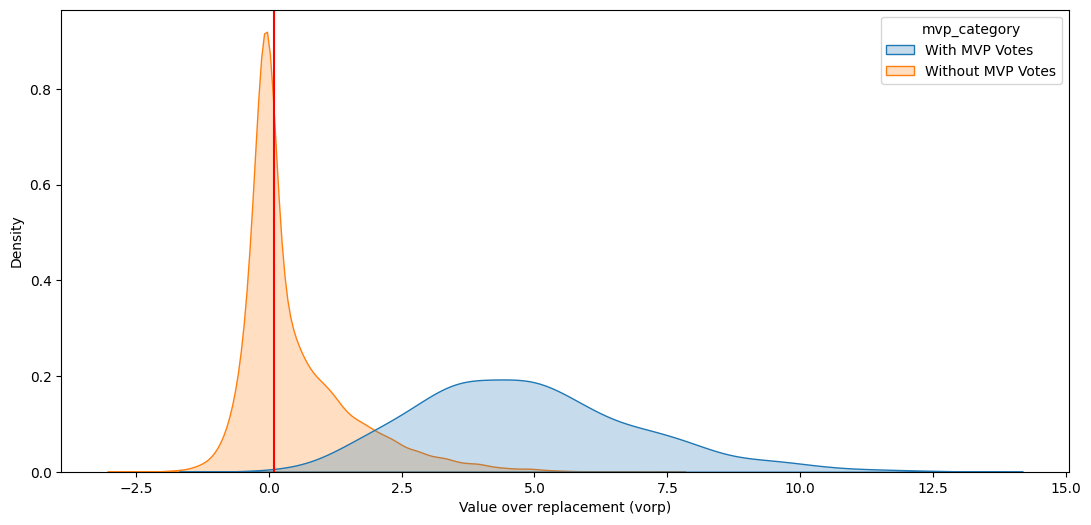

In [2]:
# Create a new column to categorize players into those with and without MVP votes
NBAMVP_df['mvp_category'] = NBAMVP_df['award_share'].apply(lambda x: 'With MVP Votes' if x > 0 else 'Without MVP Votes')

# Set up the plot
plt.figure(figsize=(13, 6))

# Create a density distribution plot using seaborn
sns.kdeplot(data=NBAMVP_df, x='vorp', hue='mvp_category', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Value over replacement (vorp)')
plt.ylabel('Density')
"""plt.title('Density Distribution of VORP (value over replacement) for NBA Players with and without MVP Votes')"""
plt.axvline(0.1,c='r')
# Show the plot
plt.show()

In [17]:
# List of players who would be cut by applying a filter on VORP

NBAMVP_df[(NBAMVP_df["vorp"] < 0.1) & (NBAMVP_df["mvp_category"] == "With MVP Votes")].head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp_category
521,1983,Norm Nixon,PG,27,LAL,79,79,34.3,6.7,14.2,...,0.069,-0.2,-1.8,-1.9,0.0,0.001,5.55,5.06,0.707,With MVP Votes


By cutting at 0.1 of VORP, we are eliminating only one player who received votes: Norm Nixon in the 1983 season. During that season, he posted decent stats while playing for one of the best teams in NBA history, which had previously won the championship. He was alongside legends like Magic Johnson, Kareem Abdul-Jabbar, James Worthy, Kurt Rambis, and others. Therefore, there are some explanations as to why he received votes. However, since he only got one vote, removing him will not have a significant impact, and it allows us to exclude many non-'eligible' players.

In [18]:
print('Number of player without votes before filtering: ', NBAMVP_df['mvp_category'].value_counts()['Without MVP Votes'])
NBAMVP_df_filtered = NBAMVP_df[(NBAMVP_df["vorp"] >= 0.1)]
print('Number of player without votes after filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

Number of player without votes before filtering:  17040
Number of player without votes after filtering:  8759


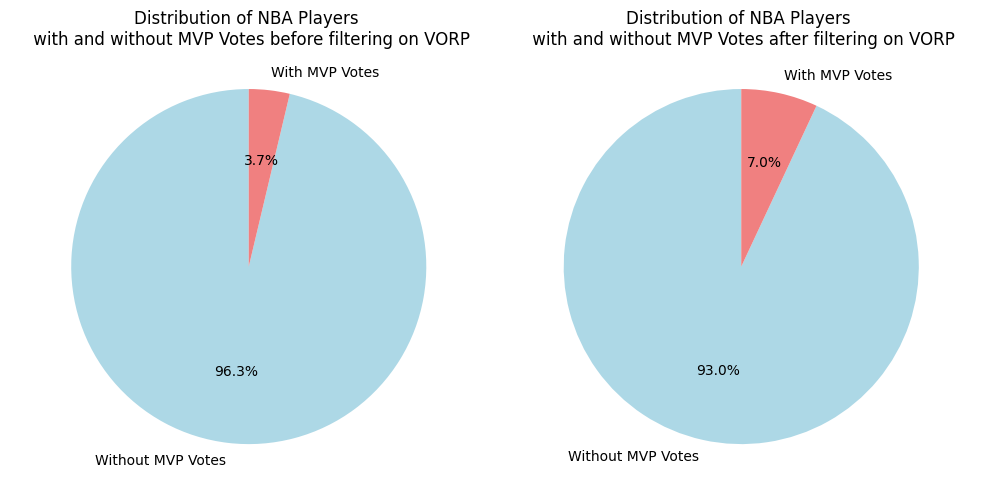

In [19]:
mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()
mvp_counts_before_filter = NBAMVP_df['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n with and without MVP Votes before filtering on VORP')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes after filtering on VORP')

plt.tight_layout()

## WS (Win share)
We already divided by 2 the number of players with no votes, we will continue by filtering on the winning share of each player.

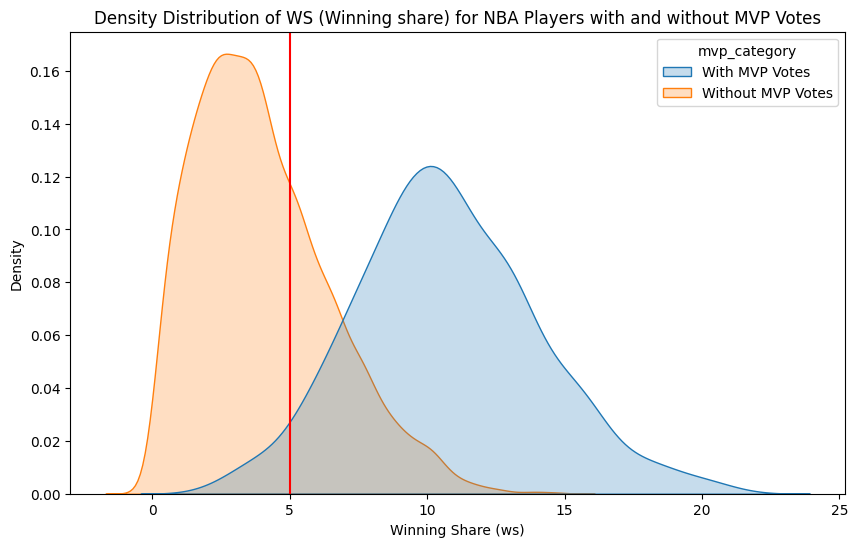

In [20]:
plt.figure(figsize=(10, 6))

# Create a density distribution plot using seaborn
sns.kdeplot(data=NBAMVP_df_filtered, x='ws', hue='mvp_category', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Winning Share (ws)')
plt.ylabel('Density')
plt.title('Density Distribution of WS (Winning share) for NBA Players with and without MVP Votes')
plt.axvline(5,c='r')
# Show the plot
plt.show()

In [21]:
NBAMVP_df_filtered[(NBAMVP_df_filtered["ws"] < 5) & (NBAMVP_df_filtered["mvp_category"] == "With MVP Votes")].head(30)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp_category
270,1982,Isiah Thomas,PG,20,DET,72,72,33.8,6.3,14.8,...,0.046,-0.3,-0.6,-0.8,0.7,0.004,-0.91,-0.63,0.476,With MVP Votes
482,1983,Alton Lister,PF,24,MIL,80,37,23.6,3.4,6.4,...,0.096,-2.9,2.4,-0.5,0.7,0.007,4.40,4.32,0.622,With MVP Votes
1628,1987,Joe Barry Carroll,C,28,GSW,81,81,33.6,8.5,18.0,...,0.082,0.9,-0.2,0.7,1.8,0.001,-2.34,-2.53,0.512,With MVP Votes
1722,1987,Steve Johnson,C,29,POR,79,74,29.7,6.3,11.3,...,0.091,-1.0,-0.4,-1.4,0.3,0.005,3.13,2.57,0.598,With MVP Votes
3169,1991,Bernard King,SF,34,WSB,64,64,37.5,11.1,23.6,...,0.070,2.8,-1.7,1.1,1.8,0.007,-4.98,-4.84,0.366,With MVP Votes
3318,1991,Isiah Thomas,PG,29,DET,48,46,34.5,6.0,13.9,...,0.098,2.2,0.5,2.7,2.0,0.011,3.27,3.07,0.610,With MVP Votes
4739,1995,Michael Jordan,SG,31,CHI,17,17,39.3,9.8,23.8,...,0.167,3.6,0.6,4.2,1.1,0.011,4.83,4.31,0.573,With MVP Votes
4745,1995,Jason Kidd,PG,21,DAL,79,79,33.8,4.2,10.8,...,0.066,0.6,0.6,1.2,2.1,0.007,-2.90,-2.40,0.439,With MVP Votes
5146,1996,Magic Johnson,PF,36,LAL,32,9,29.9,4.3,9.2,...,0.181,4.7,0.5,5.2,1.8,0.007,4.45,4.21,0.646,With MVP Votes
5567,1997,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,...,0.065,2.5,-1.6,0.9,2.2,0.001,-6.54,-5.89,0.268,With MVP Votes


In examining the outliers among players who received MVP votes in the provided dataframe, certain instances stand out as potential outliers that could be considered for elimination. 
- For instance, Michael Jordan’s return in the 1994-1995 season, although short-lived with only 17 games played, still garnered MVP votes, emphasizing the role of iconic status in the voting process. These cases emphasize the role of context and unique contributions in shaping MVP recognition and the same can be said in 2002 for his comeback with the Wizards. 
- Also, in the 2020-2021 season, Derrick Rose played 50 games in total for the Detroit Pistons and the New York Knicks. He was a good role player at best and only start three games, but Derrick Rose scored a first-place MVP vote. Yes, someone thought Derrick rose was the best player in the NBA and he ONLY STARTED 3 GAMES!
- Some more can be said but this shows how biased some votes can be and that removing them will not have too much impact on our model.

By saying this, we decided after to apply a filter on the number of games played, started, and the minutes played to keep players who played that particular season.

Number of player without votes before filtering:  8759
Number of player without votes after filtering:  2736


/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_4959/1396627693.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NBAMVP_df_filtered = NBAMVP_df_filtered[(NBAMVP_df["ws"] >= 5)]


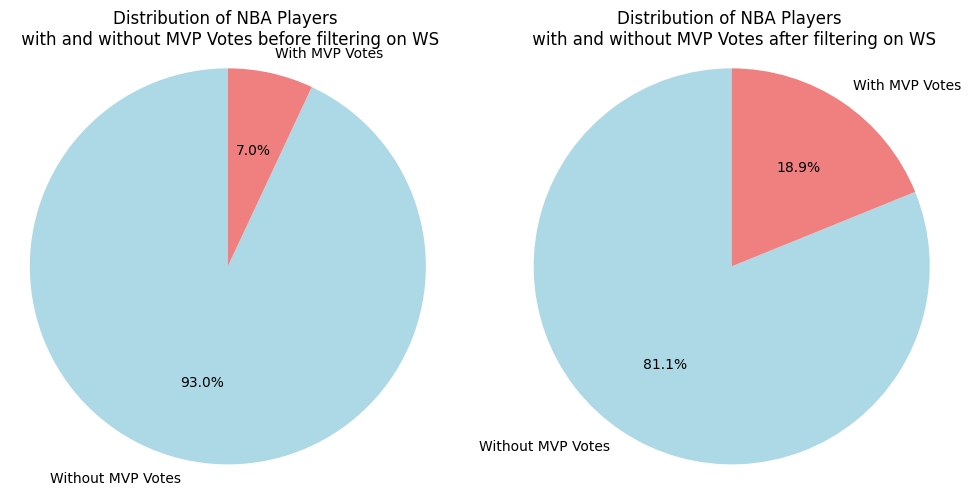

In [22]:
mvp_counts_before_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

print('Number of player without votes before filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

NBAMVP_df_filtered = NBAMVP_df_filtered[(NBAMVP_df["ws"] >= 5)]

print('Number of player without votes after filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n with and without MVP Votes before filtering on WS')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes after filtering on WS')

plt.tight_layout()

## Games played, games started, minutes played

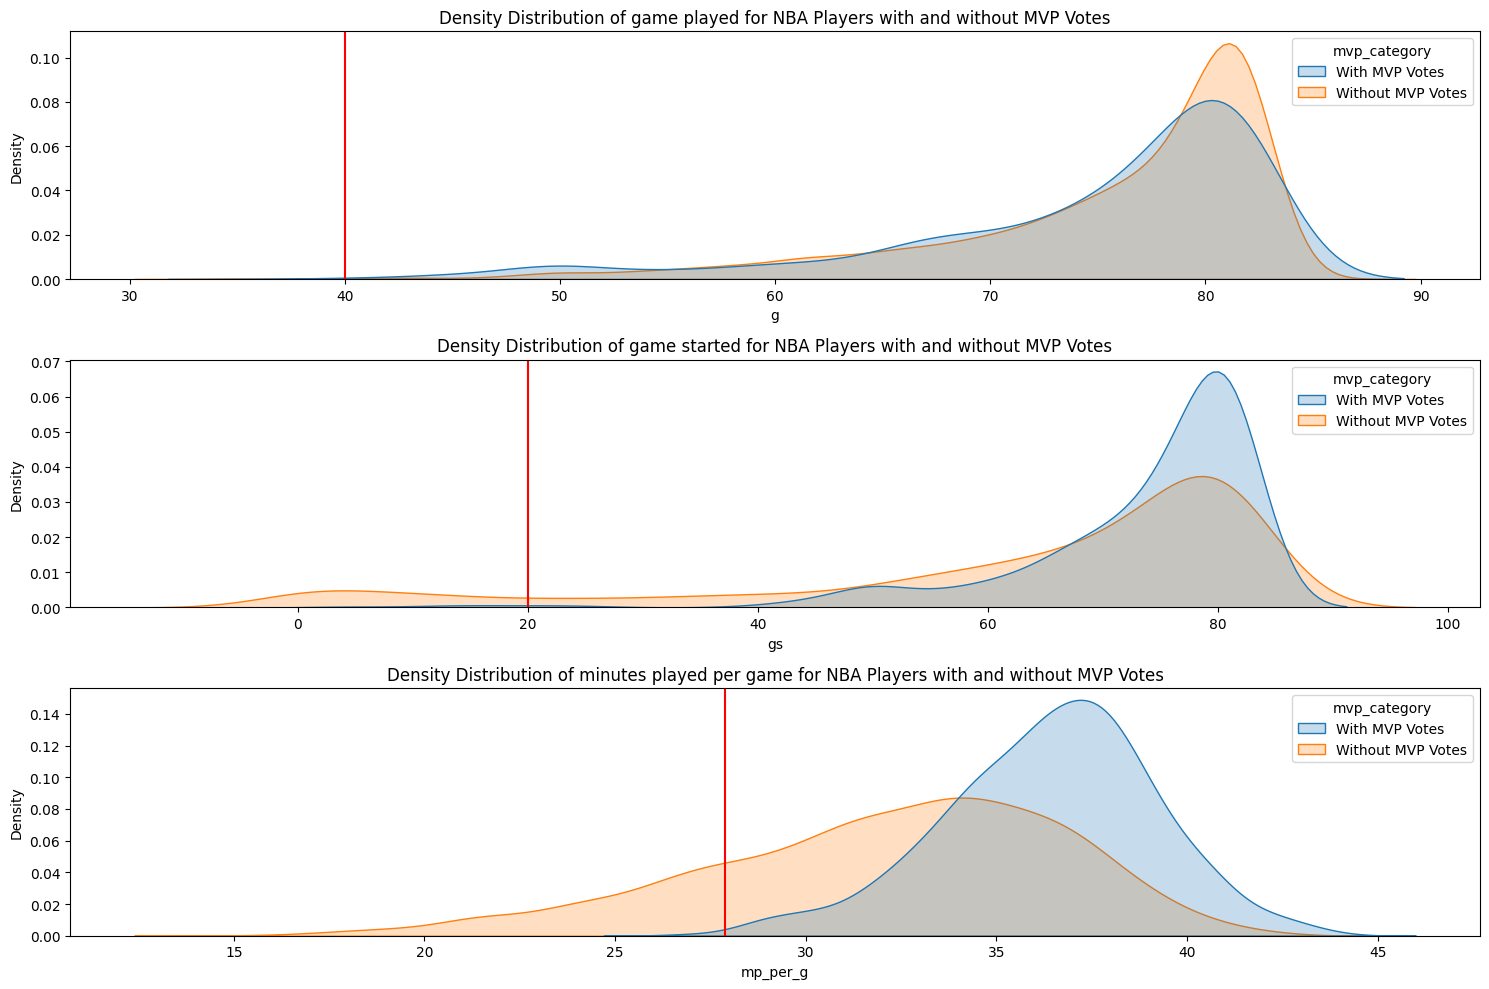

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot the histograms using Seaborn
sns.kdeplot(data=NBAMVP_df_filtered, x='g', hue='mvp_category', ax=axes[0], fill=True, common_norm=False)
axes[0].set_title('Density Distribution of game played for NBA Players with and without MVP Votes')
axes[0].axvline(40,c='r')

sns.kdeplot(data=NBAMVP_df_filtered, x='gs', hue='mvp_category', ax=axes[1], fill=True, common_norm=False)
axes[1].set_title('Density Distribution of game started for NBA Players with and without MVP Votes')
axes[1].axvline(20,c='r')

sns.kdeplot(data=NBAMVP_df_filtered, x='mp_per_g', hue='mvp_category', ax=axes[2], fill=True, common_norm=False)
axes[2].set_title('Density Distribution of minutes played per game for NBA Players with and without MVP Votes')
axes[2].axvline(27.89,c='r')

plt.tight_layout()



In [24]:
NBAMVP_df_filtered[(NBAMVP_df_filtered["mvp_category"] == "With MVP Votes") & ((NBAMVP_df_filtered["g"] < 40) | (NBAMVP_df_filtered["gs"] < 20) | (NBAMVP_df_filtered["mp_per_g"] < 27.89))][['season','player','g','gs','mp_per_g','award_share']]

,season,player,g,gs,mp_per_g,award_share
51,1982,Michael Cooper,76,14,28.9,0.004
3212,1991,Kevin McHale,68,10,30.4,0.001
3684,1992,Detlef Schrempf,80,4,32.6,0.001
6282,1999,Darrell Armstrong,50,15,30.0,0.002
6611,1999,Arvydas Sabonis,50,48,27.0,0.003
6669,1999,Rasheed Wallace,49,18,28.9,0.001
12441,2012,Derrick Rose,39,39,35.3,0.004


In examining outliers among players who received MVP votes based on minutes played, games played, and games started, certain instances merit consideration for potential elimination. But it is important to understand some things before:
- To understand the role of a sixth man on a team, it's essential to recognize the significance of players who come off the bench to provide a spark and maintain team performance when key starters are resting. The sixth man often contributes valuable scoring, playmaking, and defensive skills, acting as a crucial component in sustaining team competitiveness over the course of a game. Some legends played this role their all carreer and became true legends of the game. But then of course, those players start less game like McHale, Cooper, Schrempf and so are eliminated but sill got some few votes so can be considered outliers
- The 1999 NBA season, notably affected by the lockout, saw a condensed schedule with teams playing 50 games instead of the usual 82. So that is why, some players here from this particular season are on that list but also some outliers.

Number of player without votes before filtering:  2736
Number of player without votes after filtering:  2146


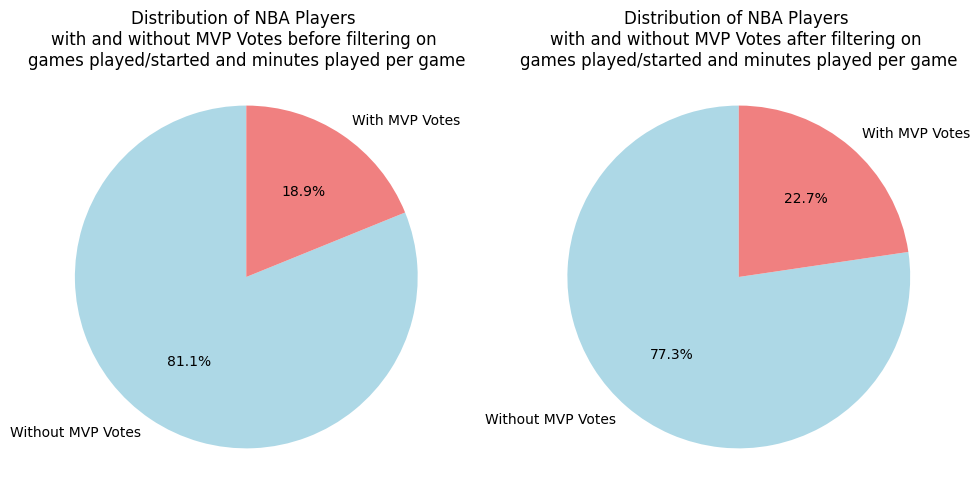

In [25]:
mvp_counts_before_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

print('Number of player without votes before filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

NBAMVP_df_filtered = NBAMVP_df_filtered[((NBAMVP_df_filtered["g"] >= 40) & (NBAMVP_df_filtered["gs"] >= 20) & (NBAMVP_df_filtered["mp_per_g"] >= 27.89))]

print('Number of player without votes after filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \nwith and without MVP Votes before filtering on \ngames played/started and minutes played per game')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \nwith and without MVP Votes after filtering on \ngames played/started and minutes played per game')

plt.tight_layout()

## Player Efficiency Rating (PER)

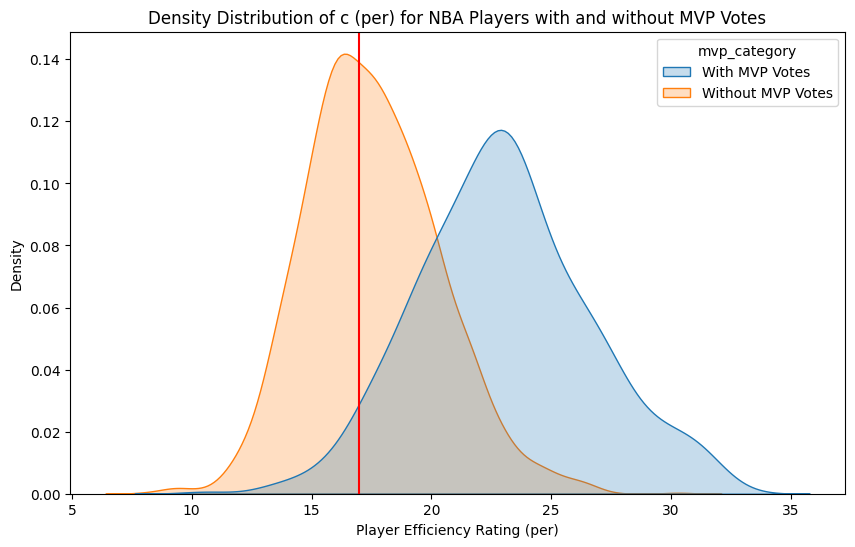

In [26]:
plt.figure(figsize=(10, 6))

# Create a density distribution plot using seaborn
sns.kdeplot(data=NBAMVP_df_filtered, x='per', hue='mvp_category', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Player Efficiency Rating (per)')
plt.ylabel('Density')
plt.title('Density Distribution of c (per) for NBA Players with and without MVP Votes')
plt.axvline(17,c='r')
# Show the plot
plt.show()

In [27]:
NBAMVP_df_filtered[(NBAMVP_df_filtered["per"] < 17) & (NBAMVP_df_filtered["mvp_category"] == "With MVP Votes")].head(30)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp_category
131,1982,Dennis Johnson,SG,27,PHO,80,77,36.7,7.2,15.4,...,0.132,1.2,0.1,1.3,2.5,0.001,3.45,3.05,0.561,With MVP Votes
276,1982,Kelly Tripucka,SF,22,DET,82,82,37.5,7.8,15.6,...,0.117,1.5,-1.3,0.2,1.7,0.020,-0.91,-0.63,0.476,With MVP Votes
296,1982,Jamaal Wilkes,SF,28,LAL,82,82,35.4,9.1,17.3,...,0.127,0.7,-1.5,-0.8,0.9,0.001,4.87,4.37,0.695,With MVP Votes
488,1983,Maurice Lucas,PF,30,PHO,77,71,33.6,6.4,13.6,...,0.132,-0.2,0.0,-0.3,1.1,0.012,5.06,4.61,0.646,With MVP Votes
1015,1985,Mark Eaton,C,28,UTA,82,82,34.3,3.7,8.2,...,0.093,-3.1,4.2,1.2,2.3,0.005,-0.11,-0.32,0.500,With MVP Votes
1214,1985,Andrew Toney,SG,27,PHI,70,65,32.0,6.4,13.1,...,0.118,1.7,-1.3,0.4,1.4,0.006,4.10,4.17,0.707,With MVP Votes
1387,1986,Dennis Johnson,PG,31,BOS,78,78,35.0,6.2,13.6,...,0.118,0.0,0.5,0.5,1.8,0.001,9.41,9.06,0.817,With MVP Votes
1569,1986,Buck Williams,PF,25,NJN,82,82,37.4,6.1,11.7,...,0.106,-0.1,-0.4,-0.6,1.1,0.003,-1.99,-1.39,0.476,With MVP Votes
1925,1988,Michael Adams,PG,25,DEN,82,75,33.9,5.1,11.3,...,0.130,1.5,0.9,2.5,3.1,0.001,4.07,3.32,0.659,With MVP Votes
2052,1988,Mark Jackson,PG,22,NYK,82,80,39.6,5.3,12.4,...,0.113,1.6,1.1,2.7,3.9,0.003,-0.49,0.14,0.463,With MVP Votes


Players who received MVP votes despite a Player Efficiency Rating (PER) under 17 are noteworthy contributors to successful teams but not typically the primary option or the "best player in the best team" as expected of MVPs. Their PER indicates solid performance without statistical dominance, highlighting their role as complementary players. These individuals stand out as outliers in MVP voting, recognized for their meaningful impact within winning teams rather than individual statistical brilliance. This underscores the varied criteria in MVP evaluation, emphasizing the nuanced nature of their contributions within a team context.

Number of player without votes before filtering:  2146
Number of player without votes after filtering:  1191


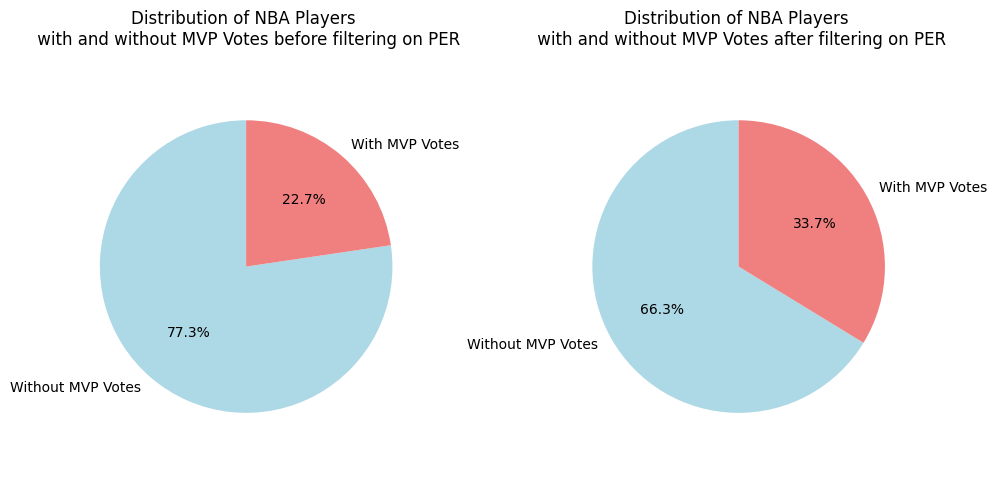

In [28]:
mvp_counts_before_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

print('Number of player without votes before filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

NBAMVP_df_filtered = NBAMVP_df_filtered[(NBAMVP_df_filtered["per"] >= 17)]

print('Number of player without votes after filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n with and without MVP Votes before filtering on PER')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes after filtering on PER')

plt.tight_layout()

## Usage percentage

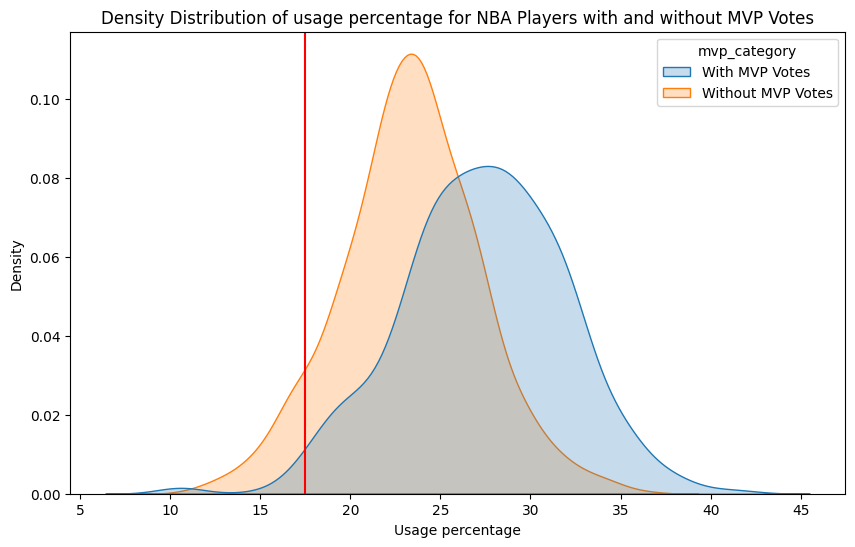

In [29]:
plt.figure(figsize=(10, 6))

# Create a density distribution plot using seaborn
sns.kdeplot(data=NBAMVP_df_filtered, x='usg_pct', hue='mvp_category', fill=True, common_norm=False)

# Add labels and title
plt.xlabel('Usage percentage')
plt.ylabel('Density')
plt.title('Density Distribution of usage percentage for NBA Players with and without MVP Votes')
plt.axvline(17.5,c='r')
# Show the plot
plt.show()

In [30]:
NBAMVP_df_filtered[(NBAMVP_df_filtered["usg_pct"] < 17.5) & (NBAMVP_df_filtered["mvp_category"] == "With MVP Votes")].head(30)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp_category
727,1984,Rickey Green,PG,29,UTA,81,81,34.2,5.4,11.2,...,0.138,1.8,1.2,3.0,3.5,0.011,1.13,0.81,0.549,With MVP Votes
2184,1988,John Stockton,PG,25,UTA,82,79,34.7,5.5,9.6,...,0.238,5.2,3.3,8.5,7.6,0.019,3.68,2.96,0.573,With MVP Votes
3672,1992,Dennis Rodman,PF,30,DET,82,80,40.3,4.2,7.7,...,0.183,1.9,0.9,2.8,4.0,0.027,2.05,2.06,0.585,With MVP Votes
5661,1997,Dikembe Mutombo,C,30,ATL,80,80,37.2,4.8,9.0,...,0.183,0.3,2.4,2.6,3.5,0.003,5.44,5.52,0.683,With MVP Votes
8002,2002,Ben Wallace,C,27,DET,80,80,36.5,3.2,6.0,...,0.190,1.2,3.3,4.4,4.8,0.019,2.13,1.69,0.610,With MVP Votes
8422,2003,Ben Wallace,C,28,DET,73,73,39.4,2.9,6.0,...,0.176,0.4,3.5,3.9,4.3,0.028,3.68,2.98,0.610,With MVP Votes
8866,2004,Ben Wallace,C,29,DET,81,81,37.7,3.9,9.2,...,0.160,0.2,3.3,3.5,4.3,0.020,5.84,5.04,0.659,With MVP Votes
8968,2005,Marcus Camby,C,30,DEN,66,66,30.5,4.2,9.1,...,0.138,-0.2,3.3,3.1,2.6,0.001,2.02,2.22,0.598,With MVP Votes
12865,2013,Joakim Noah,C,27,CHI,66,64,36.8,4.6,9.5,...,0.145,0.6,2.7,3.4,3.3,0.001,0.32,-0.01,0.549,With MVP Votes
16731,2021,Rudy Gobert,C,28,UTA,71,71,30.8,5.5,8.2,...,0.248,2.1,2.8,4.9,3.8,0.008,9.25,8.96,0.722,With MVP Votes


Number of player without votes before filtering:  1191
Number of player without votes after filtering:  1104


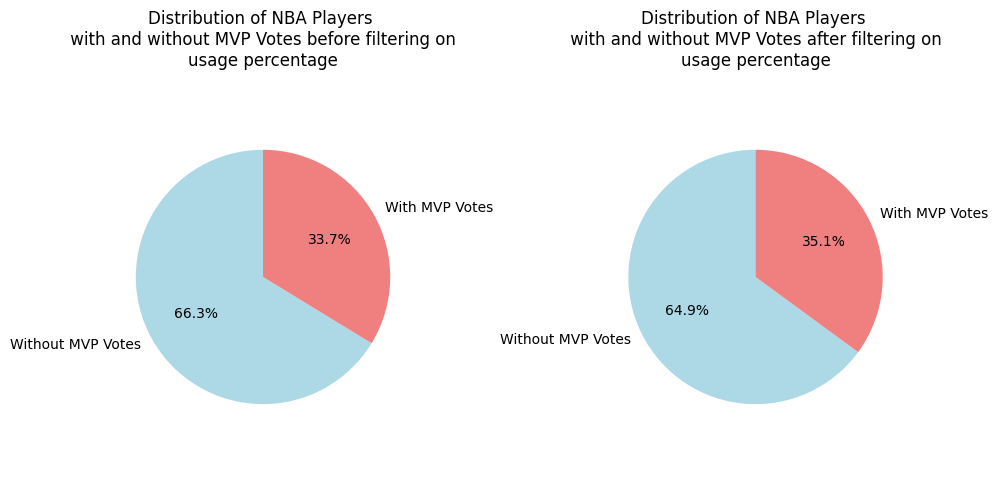

In [31]:
mvp_counts_before_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

print('Number of player without votes before filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

NBAMVP_df_filtered = NBAMVP_df_filtered[NBAMVP_df_filtered["usg_pct"] >= 17.5]

print('Number of player without votes after filtering: ', NBAMVP_df_filtered['mvp_category'].value_counts()['Without MVP Votes'])

mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n with and without MVP Votes before filtering on \nusage percentage')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes after filtering on \nusage percentage')

plt.tight_layout()

## All other higly correlated columns

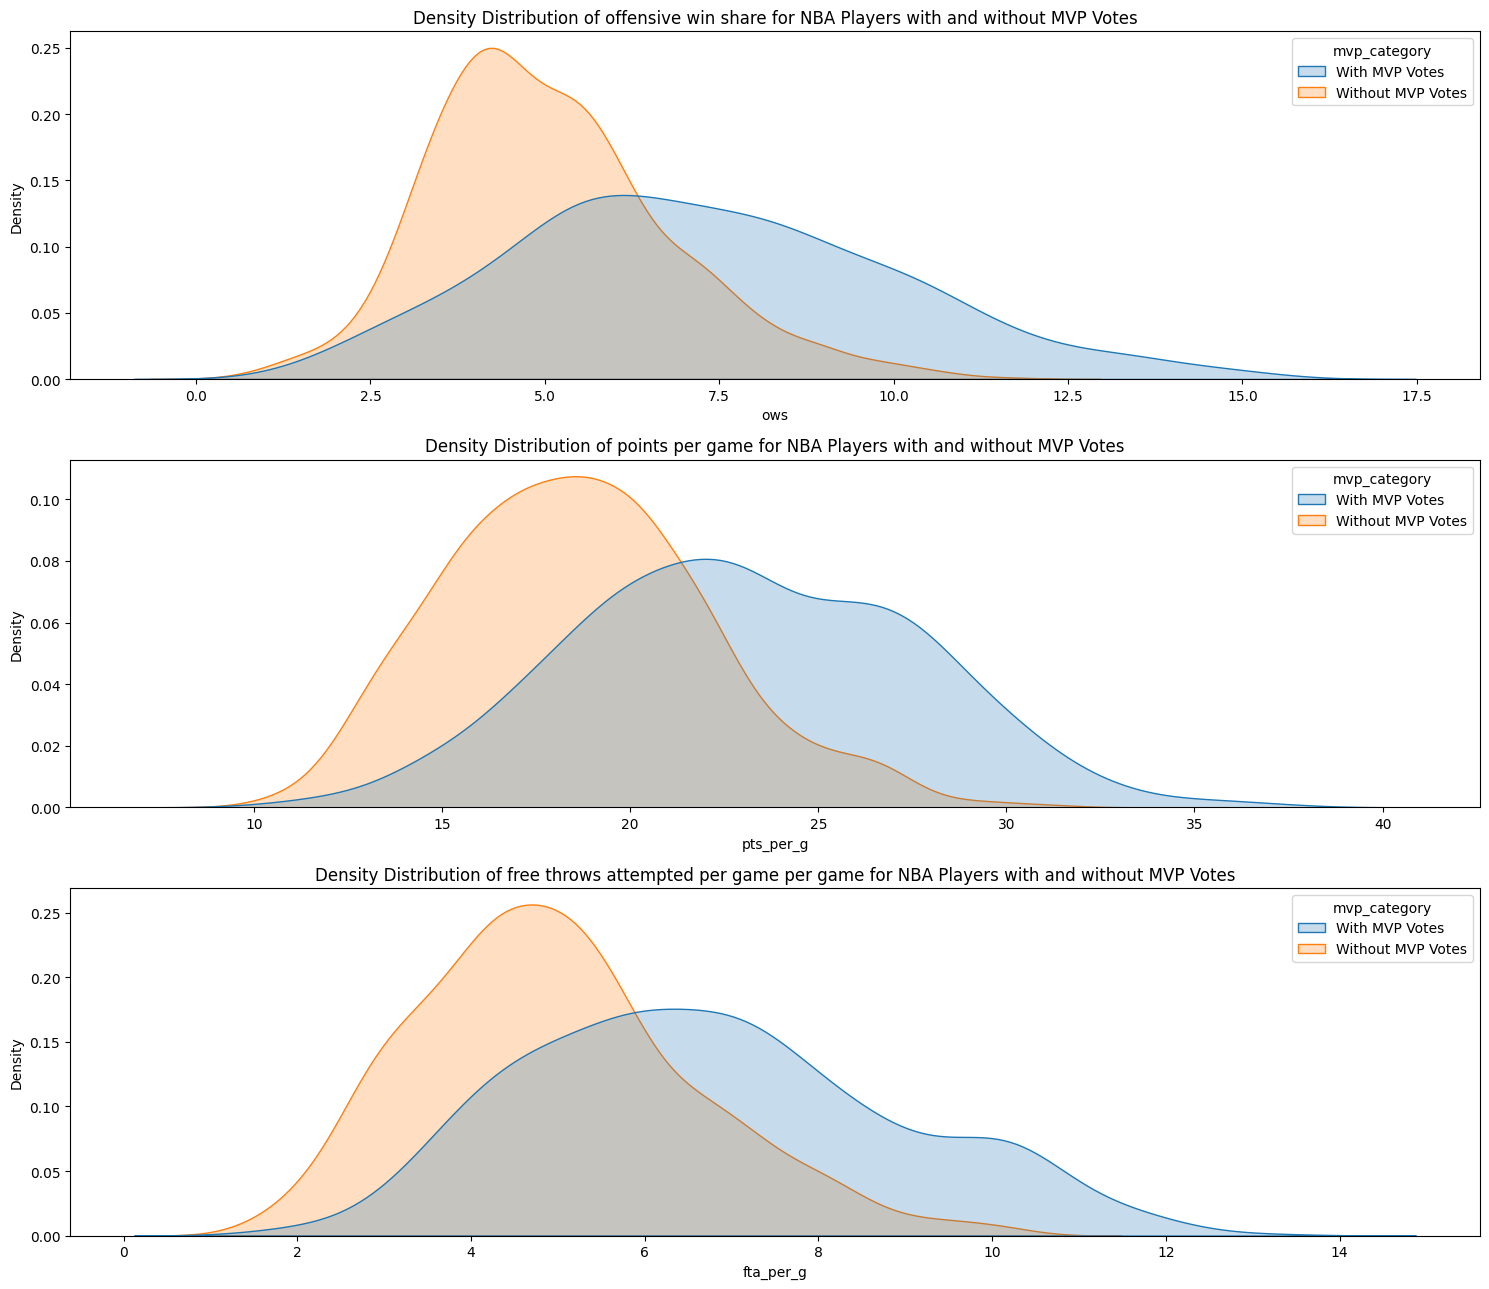

In [32]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 13))

# Plot the histograms using Seaborn
sns.kdeplot(data=NBAMVP_df_filtered, x='ows', hue='mvp_category', ax=axes[0], fill=True, common_norm=False)
axes[0].set_title('Density Distribution of offensive win share for NBA Players with and without MVP Votes')

sns.kdeplot(data=NBAMVP_df_filtered, x='pts_per_g', hue='mvp_category', ax=axes[1], fill=True, common_norm=False)
axes[1].set_title('Density Distribution of points per game for NBA Players with and without MVP Votes')


sns.kdeplot(data=NBAMVP_df_filtered, x='fta_per_g', hue='mvp_category', ax=axes[2], fill=True, common_norm=False)
axes[2].set_title('Density Distribution of free throws attempted per game per game for NBA Players with and without MVP Votes')

plt.tight_layout()

As we can see here for all those higly correlated columns to award share, finding a cutoffs is possible but will have few benefits:
we will reduce the number of players with votes by eliminating very few players with no votes.

So then we will stop the process here.

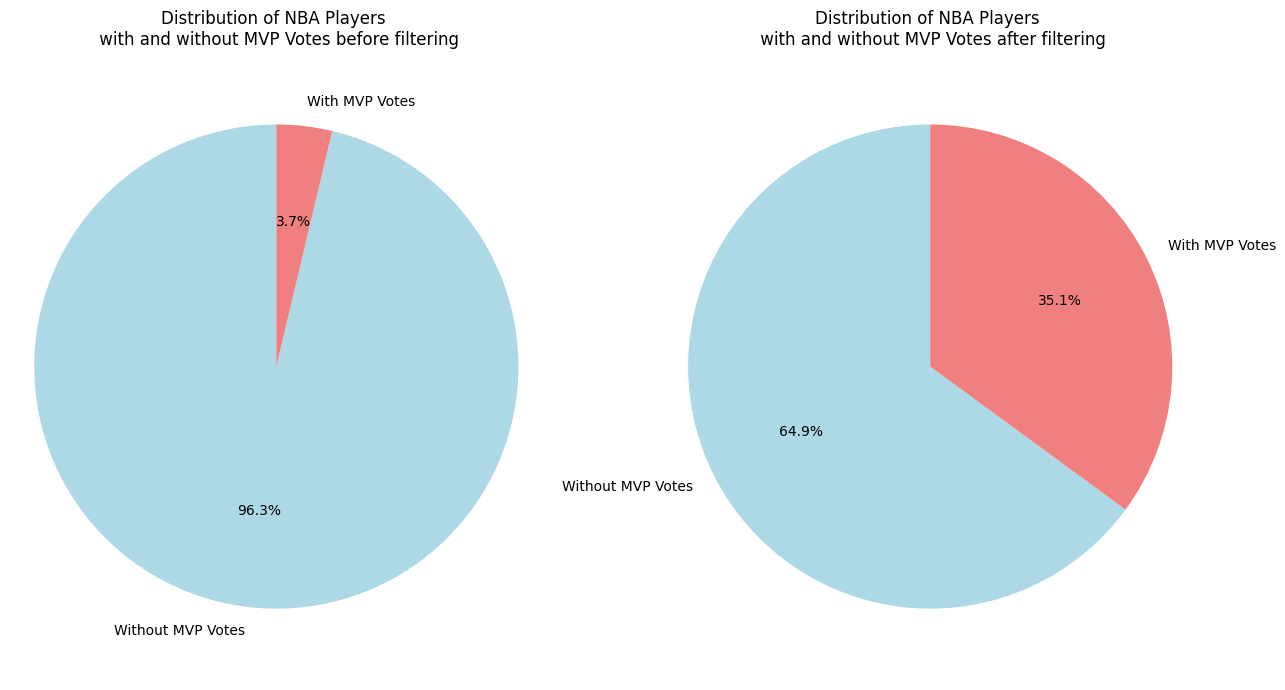

In [33]:
mvp_counts_after_filter = NBAMVP_df_filtered['mvp_category'].value_counts()
mvp_counts_before_filter = NBAMVP_df['mvp_category'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(13, 7))

axs[0].pie(mvp_counts_before_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].axis('equal')  
axs[0].set_title('Distribution of NBA Players \n with and without MVP Votes before filtering')


axs[1].pie(mvp_counts_after_filter, labels=mvp_counts_after_filter.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of NBA Players \n with and without MVP Votes after filtering')

plt.tight_layout()

So at the end of all the process, we are left with around 1700 players and 35,1% of them did got MVP Votes for theirs stats that particular season.

{'With MVP Votes': [657, 656, 652, 646, 644, 624, 607, 596], 'Without MVP Votes': [17040, 8759, 7842, 5156, 3528, 2799, 1337, 1104]}


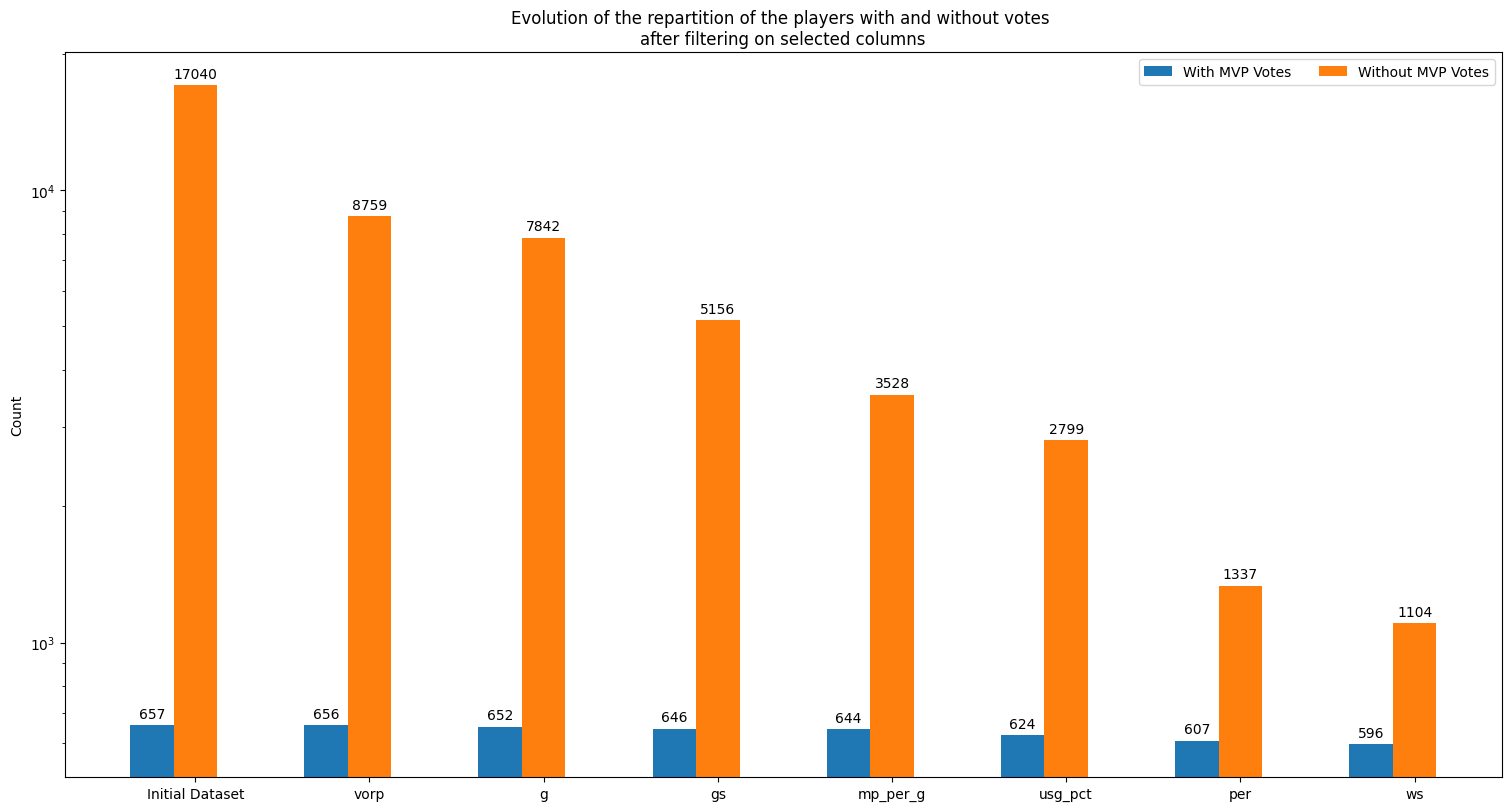

In [24]:
import matplotlib.pyplot as plt
import numpy as np

NBA_test_df = NBAMVP_df.copy()


eligibilty_criterias = {
    'vorp': 0.1,
    'g': 40,
    'gs': 20,
    'mp_per_g': 27.89,
    "usg_pct": 17.5,
    "per": 17,
    "ws": 5
}

species = ['Initial Dataset'] + list(eligibilty_criterias.keys())

penguin_means = {
    'With MVP Votes': [NBA_test_df['mvp_category'].value_counts()['With MVP Votes']] ,
    'Without MVP Votes':   [NBA_test_df['mvp_category'].value_counts()['Without MVP Votes']],
}

x = np.arange(len(species)) # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,8))

for column, treshold in eligibilty_criterias.items():
    NBA_test_df = NBA_test_df[NBA_test_df[column] >= treshold]
    for key in penguin_means.keys():
        penguin_means[key].append(NBA_test_df['mvp_category'].value_counts()[key])

print(penguin_means)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Evolution of the repartition of the players with and without votes \nafter filtering on selected columns')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
ax.set_yscale('log')

plt.show()

array([1104,  596])